In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
def visualize(data, x, y):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    sns.stripplot(x, y, data=data, jitter=True, size=4, ax=axes[0][0])
    sns.factorplot(x=x, y=y, data=data, kind='bar', ax=axes[0][1], sharex=False, sharey=False, legend=False)
    data.boxplot(column=y, by=x, ax=axes[1][0])
    sns.violinplot(x=x, y=y, data=data, ax=axes[1][1])
    
    # Remove the extra plot that factorplot draws
    plt.close(2)
    plt.show()

In [2]:
hep_c = pd.read_csv('hepatitis_c.csv', dtype={'SEQN': int})
blood_count = pd.read_csv('complete_blood_count.csv', dtype={'SEQN': int})

In [4]:
master = pd.merge(hep_c, blood_count, how='inner', on='SEQN')

In [18]:
master['LBXHCR'].value_counts()

3.0    6964
2.0      63
1.0      50
Name: LBXHCR, dtype: int64

In [14]:
master.groupby(by='LBXHCR').count()

,SEQN,LBXHCG,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,...,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMCH,LBXRDW,LBXPLTSI,LBXMPSI
LBXHCR,,,,,,,,,,,,,,,,,,,,,
1.0,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,0,50,50,50
2.0,63,0,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,0,63,63,63
3.0,6964,0,6924,6923,6923,6923,6923,6923,6923,6923,...,6923,6924,6924,6924,6924,6924,0,6924,6924,6924


In [6]:
master.groupby(by='LBXHCR').mean()

,SEQN,LBXHCG,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,...,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMCH,LBXRDW,LBXPLTSI,LBXMPSI
LBXHCR,,,,,,,,,,,,,,,,,,,,,
1.0,89012.860000,1.9,6.648000,33.504000,9.106000,54.080000,2.548000,0.890000,2.152000,0.600000,...,0.060000,4.720600,14.108000,42.560000,90.550000,29.992000,NaN,13.988000,209.160000,8.546000
2.0,89001.222222,NaN,7.712698,29.430159,8.790476,57.993651,3.069841,0.846032,2.219048,0.653968,...,0.060317,4.781587,13.844444,41.728571,87.493651,29.017460,NaN,14.319048,244.984127,8.239683
3.0,88737.508472,NaN,7.314587,32.532760,8.139405,55.616510,3.053893,0.781944,2.328153,0.580774,...,0.052925,4.752912,13.768400,41.356571,87.263215,29.038403,NaN,13.714515,247.737868,8.279694


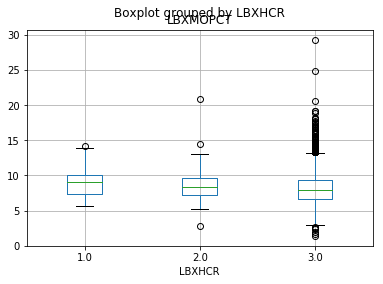

In [10]:
master.boxplot(column='LBXMOPCT', by='LBXHCR')

# Trich

In [53]:
trich = pd.read_csv('trichomonas.csv', dtype={'SEQN':int})
sex_steroid_hormone = pd.read_csv('sex_steroid_hormone.csv', dtype={'SEQN':int})
urine_flow = pd.read_csv('urine_flow_rate.csv', dtype={'SEQN':int})

In [57]:
urine_flow.head()

,SEQN,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDFLOW3,URDTIME3
0,83732,161.0,1.288,125.0,NaN,NaN,NaN,NaN,NaN,NaN
1,83733,106.0,0.855,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2,83734,233.0,1.688,138.0,NaN,NaN,NaN,NaN,NaN,NaN
3,83735,86.0,0.819,105.0,NaN,NaN,NaN,NaN,NaN,NaN
4,83736,12.0,0.261,46.0,29.0,0.246,118.0,NaN,NaN,NaN


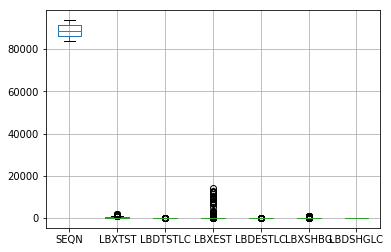

In [55]:
sex_steroid_hormone.boxplot()

In [33]:
sex_steroid_hormone.describe()

,SEQN,LBXTST,LBDTSTLC,LBXEST,LBDESTLC,LBXSHBG,LBDSHGLC
count,8021.000000,7207.000000,7207.000000,7150.000000,7150.000000,6959.000000,6959.0
mean,88739.963097,187.535260,0.003608,69.274112,0.152448,65.610716,0.0
std,2876.084165,235.040491,0.059959,548.269512,0.359479,58.180217,0.0
min,83732.000000,0.530000,0.000000,2.114000,0.000000,4.810000,0.0
25%,86258.000000,14.900000,0.000000,7.392500,0.000000,33.350000,0.0
50%,88744.000000,33.400000,0.000000,21.000000,0.000000,50.290000,0.0
75%,91222.000000,348.000000,0.000000,35.500000,0.000000,80.215000,0.0
max,93702.000000,2000.000000,1.000000,14000.000000,1.000000,1031.000000,0.0


In [58]:
master2 = pd.merge(trich, blood_count, on='SEQN')
master2a = pd.merge(master2, sex_steroid_hormone, on='SEQN')
master2b = pd.merge(master2a, urine_flow, on='SEQN')

In [31]:
master2a.URXUTRI.value_counts()

2.0    3742
1.0      92
Name: URXUTRI, dtype: int64

In [93]:
with pd.option_context('display.max_columns', 100):
    display(master2a.groupby('URXUTRI').mean())

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMCH,LBXRDW,LBXPLTSI,LBXMPSI,LBXTST,LBDTSTLC,LBXEST,LBDESTLC,LBXSHBG,LBDSHGLC
URXUTRI,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,88900.021739,7.445882,35.263529,7.894118,53.478824,2.596471,0.888235,2.541176,0.578824,4.075294,0.194118,0.062353,4.621765,12.727059,38.958824,84.532941,27.603529,NaN,14.815294,259.058824,8.551765,96.101860,0.0,113.829860,0.023256,65.798313,0.0
2.0,88679.318279,7.394479,31.786151,7.893720,56.891225,2.764929,0.788618,2.277825,0.570395,4.298066,0.198570,0.055004,4.815008,14.039266,42.165191,87.795235,29.217040,NaN,13.670235,245.412556,8.357988,226.490565,0.0,114.908679,0.033599,60.965307,0.0


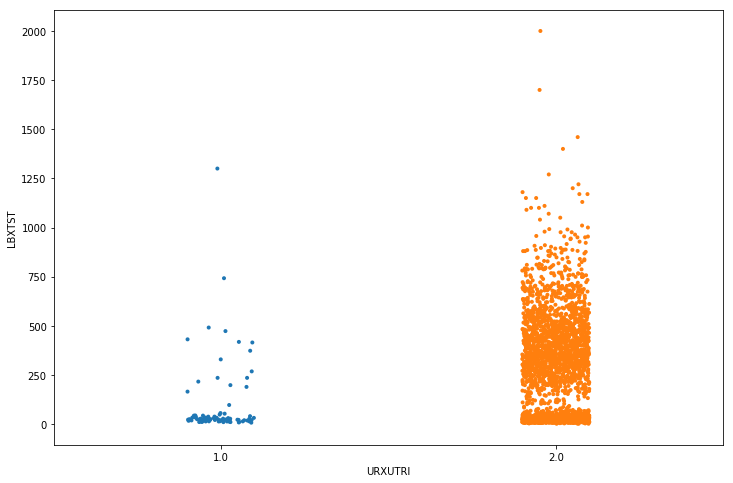

In [96]:
plt.figure(figsize=(12,8))
sns.stripplot('URXUTRI', 'LBXTST', data=master2b, jitter=True, size=4)

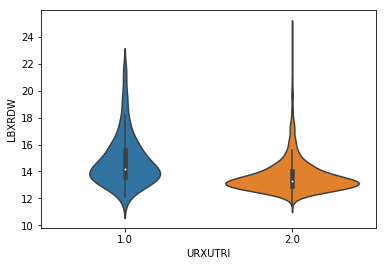

In [49]:
sns.violinplot(x='URXUTRI', y='LBXRDW', data=master2a)

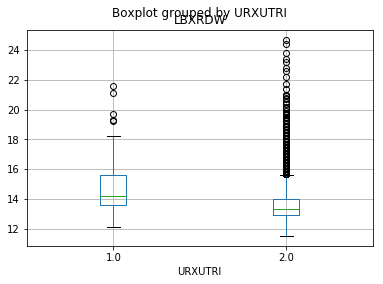

In [51]:
master2a.boxplot(column='LBXRDW', by='URXUTRI')

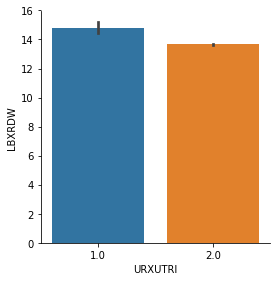

In [52]:
sns.factorplot(x='URXUTRI', y='LBXRDW', data=master2a, kind='bar')

In [59]:
master2b.groupby('URXUTRI').mean()

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,...,LBDSHGLC,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDFLOW3,URDTIME3
URXUTRI,,,,,,,,,,,,,,,,,,,,,
1.0,88900.021739,7.445882,35.263529,7.894118,53.478824,2.596471,0.888235,2.541176,0.578824,4.075294,...,0.0,80.967391,0.669267,156.720930,102.225806,1.122387,100.290323,20.000000,0.500000,40.000000
2.0,88679.318279,7.394479,31.786151,7.893720,56.891225,2.764929,0.788618,2.277825,0.570395,4.298066,...,0.0,117.305452,0.995970,147.162626,127.591045,1.386209,105.901493,109.208333,1.634875,68.208333


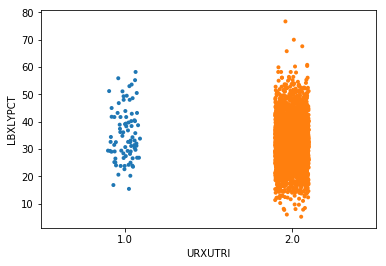

In [89]:
sns.stripplot('URXUTRI', 'LBXLYPCT', data=master2b, jitter=True, size=4)

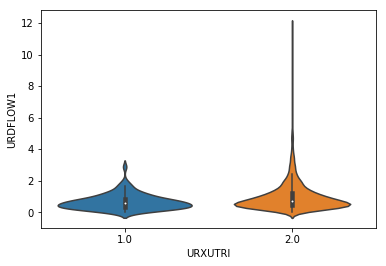

In [62]:
sns.violinplot('URXUTRI', 'URDFLOW1', data=master2b)

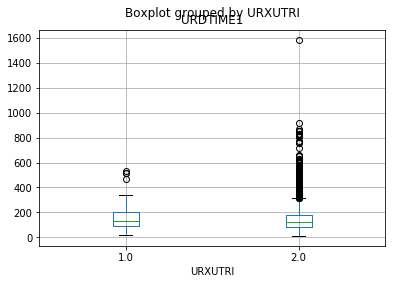

In [64]:
master2b.boxplot(column='URDTIME1', by='URXUTRI')

# Current Health

In [97]:
current_health = pd.read_csv('../questionnaire/current_health.csv', dtype={'SEQN':int})
master_3a = pd.merge(current_health, blood_count, on='SEQN')
master_3 = pd.merge(master_3a, sex_steroid_hormone, on='SEQN')

In [98]:
current_health.HSD010.value_counts()

3.0    2493
2.0    1652
4.0    1212
1.0     606
5.0     203
Name: HSD010, dtype: int64

In [160]:
with pd.option_context('display.max_columns', 100):
    display(master_3.groupby('HSD010').mean())

,SEQN,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,HSAQUEX,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMCH,LBXRDW,LBXPLTSI,LBXMPSI,LBXTST,LBDTSTLC,LBXEST,LBDESTLC,LBXSHBG,LBDSHGLC
HSD010,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,88710.369637,1.886139,1.955446,2.003300,1.958159,4.185185,1.949791,2.0,6.725766,33.171532,8.381802,54.874955,2.912432,0.786667,2.169550,0.552793,3.769910,0.190090,0.045405,4.793928,14.087387,42.197117,88.275676,29.458018,NaN,13.516937,233.672072,8.295135,263.812450,0.000000,112.507952,0.066055,66.978302,0.0
2.0,88801.686441,1.869249,1.946731,1.990920,1.963354,5.027397,1.998591,2.0,7.070466,32.330331,8.316008,55.860920,2.833377,0.785224,2.272910,0.570447,3.986261,0.194362,0.048801,4.772798,13.989313,42.001101,88.267617,29.384974,NaN,13.599741,239.259067,8.293005,223.719564,0.000000,82.619318,0.051215,65.273958,0.0
3.0,88661.374649,1.863618,1.954673,1.967108,1.962654,6.535354,1.958260,2.0,7.427477,31.396528,8.087849,56.946444,2.900423,0.793734,2.284759,0.586622,4.297544,0.210203,0.056520,4.778599,13.950381,41.922693,87.992676,29.266342,NaN,13.797079,241.591871,8.392845,214.741788,0.000428,83.832546,0.062958,61.289890,0.0
4.0,88781.041254,1.828383,1.930693,1.949670,1.978355,4.960000,1.907359,2.0,7.620260,30.343983,8.110563,57.925974,2.931602,0.811775,2.240606,0.601818,4.507706,0.217576,0.060346,4.722424,13.752814,41.448658,88.035411,29.193939,NaN,14.049870,245.006926,8.395844,198.223128,0.001757,51.652241,0.077128,54.752121,0.0
5.0,88239.576355,1.807882,1.891626,1.995074,2.005076,2.166667,1.847716,2.0,7.921538,29.252821,8.295897,58.687179,2.998974,0.886154,2.226667,0.638974,4.774872,0.227179,0.071795,4.595385,13.315385,40.312821,88.251795,29.133846,NaN,14.503077,243.682051,8.495385,177.002031,0.000000,30.254712,0.104712,56.977447,0.0


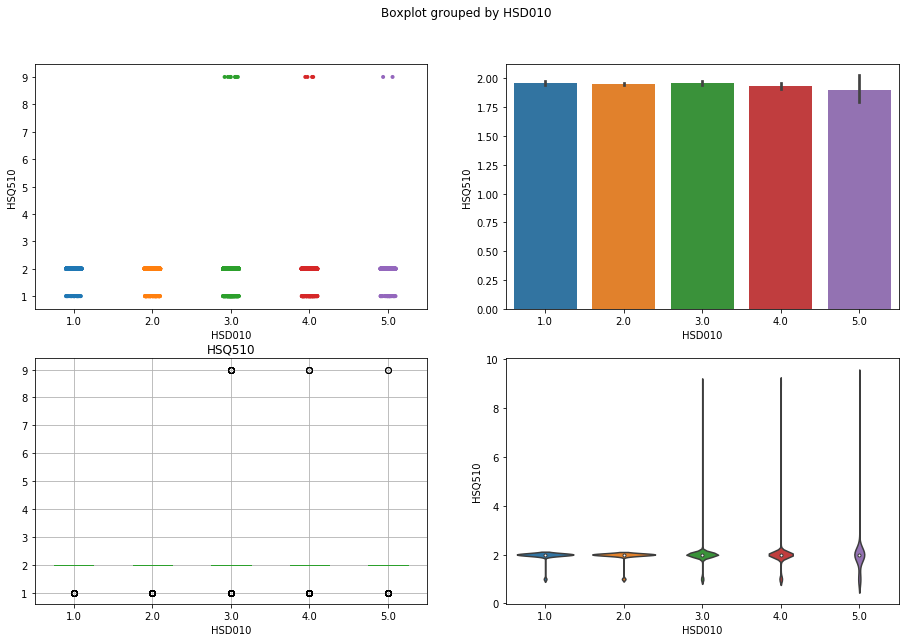

In [182]:
visualize(master_3, 'HSD010', "HSQ510")

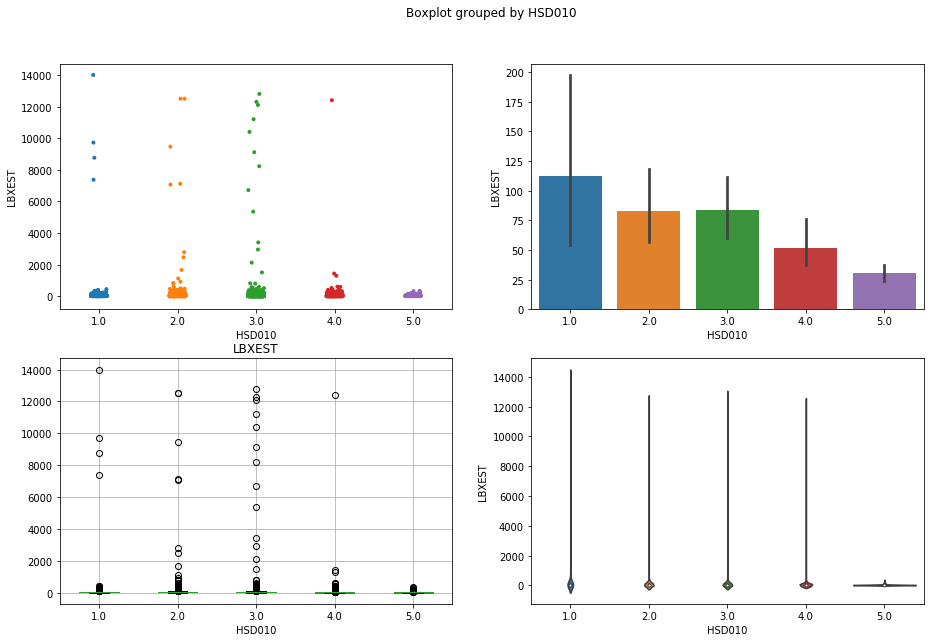

In [183]:
visualize(master_3, 'HSD010', "LBXEST")

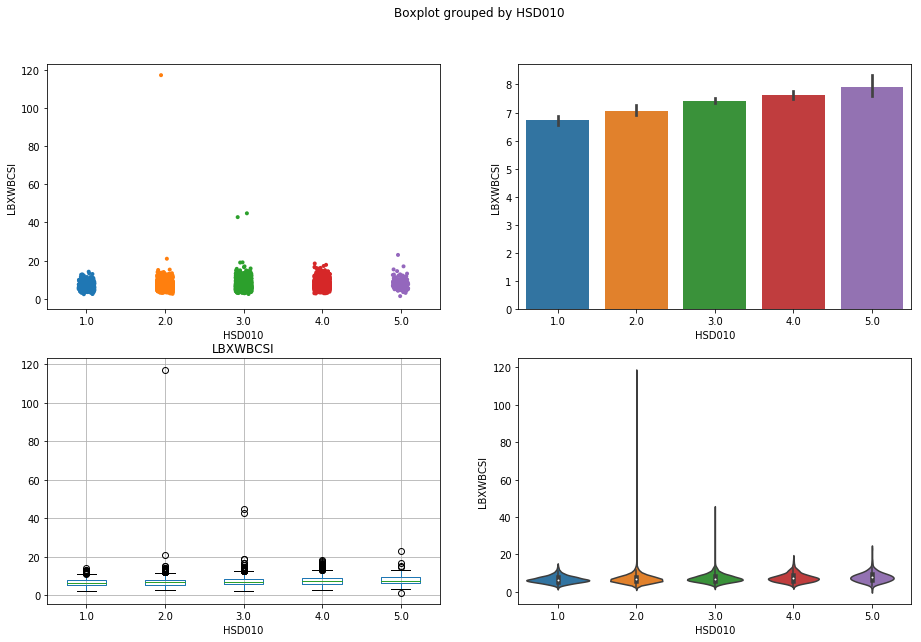

In [181]:
visualize(master_3, 'HSD010', "LBXWBCSI")

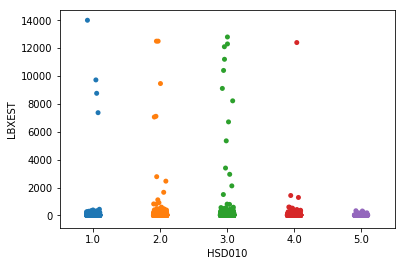

In [157]:
# plt.figure(figsize=(10,20))
sns.stripplot(x='HSD010', y='LBXEST', data=master_3, jitter=True, size=5)

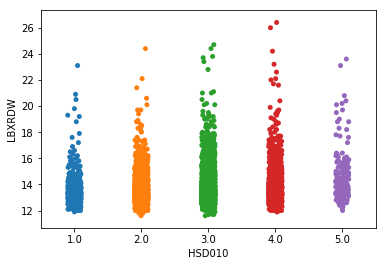

In [102]:
sns.stripplot(x='HSD010', y='LBXRDW', data=master_3, jitter=True)

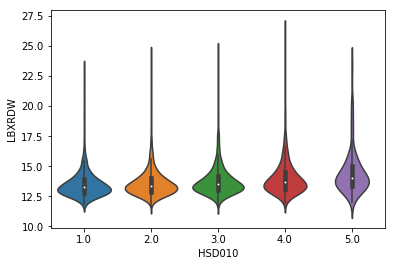

In [74]:
sns.violinplot(x='HSD010', y='LBXRDW', data=master_3)

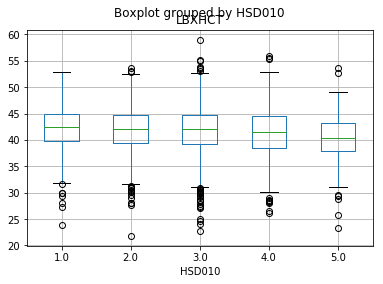

In [78]:
master_3.boxplot(column='LBXHCT', by='HSD010')